In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
(X_train_full,y_train_full),(X_test,y_test)=keras.datasets.mnist.load_data()

In [6]:
np.set_printoptions(linewidth=1000)
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [7]:
X_train_full.shape

(60000, 28, 28)

머신러닝은 정확도가 80점대, 정확도가 90점대. 딥러닝을 중심으로 하면 좋을듯
DNN(data network AT)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255

In [10]:
y_valid,y_train=y_train_full[:5000], y_train_full[5000:]  #정답이 들어있어서 나누는거 아님

In [11]:
X_test=X_test/255 # 0과 1사이로 minmaxscaling

In [12]:
y_train[0]

7

In [13]:
np.set_printoptions(linewidth=1000)
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

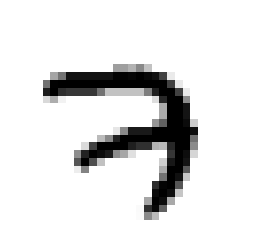

In [14]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [15]:
X_valid.shape

(5000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

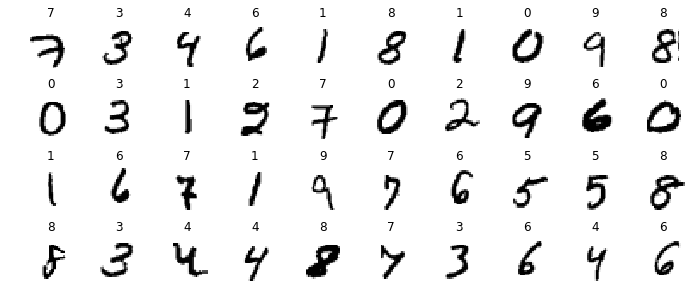

In [17]:
# 4*10으로 보기
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range(n_rows): #0,1,2,3
    for col in range(n_cols): #0,1,2,3,4,5,6,7,8,9
        index=n_cols*row + col # 10*0 + 0.....0~9/10~19/20~29/20~39
        plt.subplot(n_rows,n_cols,index+1) #4, 10, 1 4열 10 행 중 첫번째
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [18]:
K=keras.backend
#callback을 상속받아서 재정의해서 쓰기
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates=[]
        self.losses=[]
    def on_batch_end(self,batch,logs): #어떤 상황이 되었을 때
        self.rates.append(K.get_value(self.model.optimizer.lr)) #learing rate를 얻어서 추가
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr*self.factor)

In [19]:
#batch가 조절 될 때 마다 learing rate 를 조절하겠다.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), #28*28이 들어와서 일차원으로 펴야 함
    keras.layers.Dense(300,activation='relu'),# 784>300>100>10
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])
#원래는 categorical_cross~이었는데 y를 원 핫 인코딩 안했었는데 애는 자동적으로 y를 원핫인코딩 자동적
#으로 해줌
#accuracy: true,false에서 맞춘갯수 등등. 분류 문제에는 정확도가 나옴

In [22]:
expon_lr=ExponentialLearningRate(factor=1.005)

In [23]:
%%time
hist=model.fit(X_train,y_train,epochs=1,validation_data=(X_valid,y_valid),
              callbacks=[expon_lr])
#nan으로 나온다 -> not a number. 학습이 실패했다는 것.
#대표적인 경우: learning rate가 잘 안됨/ 변측치에 곱셈하면서

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 5s 86us/sample - loss: nan - accuracy: 0.5799 - val_loss: nan - val_accuracy: 0.0958
Wall time: 4.76 s


C:\Users\User\anaconda3\envs\tf2\lib\site-packages\matplotlib\axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\matplotlib\axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\matplotlib\axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\matplotlib\axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to f

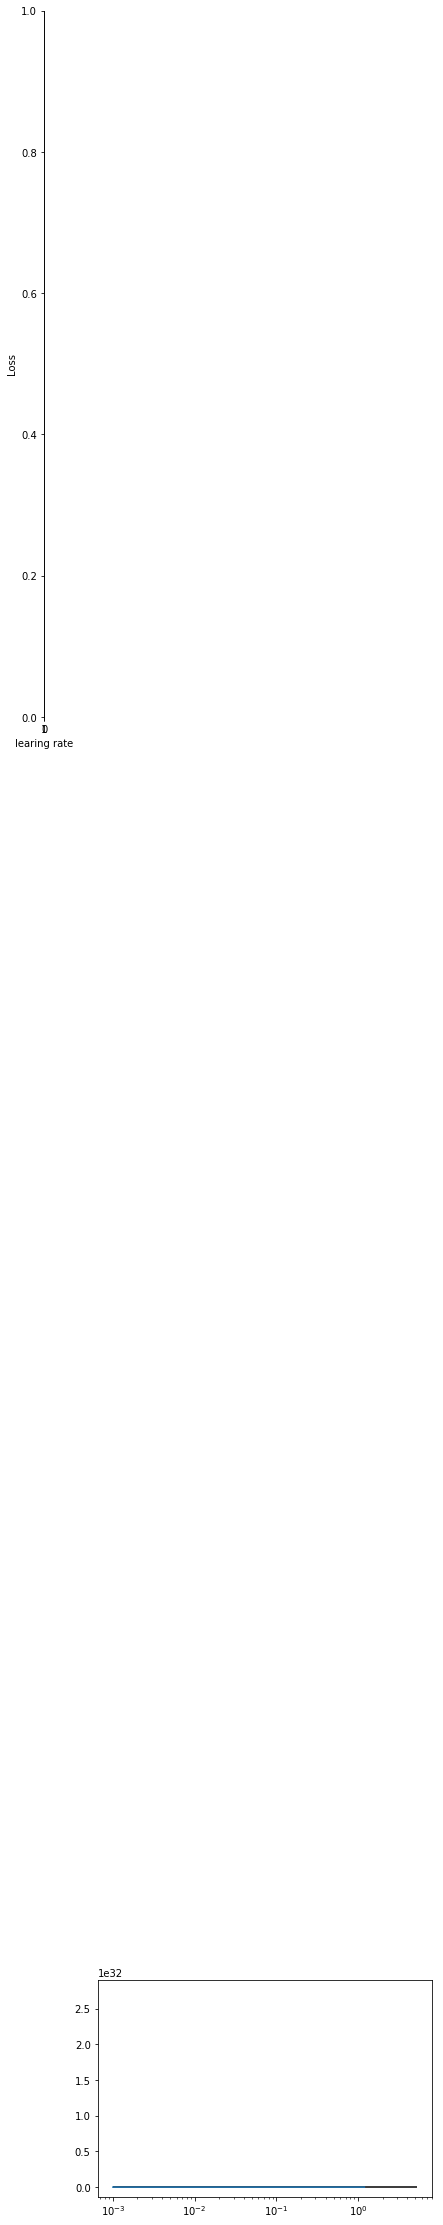

In [24]:
plt.plot(expon_lr.rates,expon_lr.losses) 
#학습이 안됨
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses),min(expon_lr.rates),max(expon_lr.rates))
plt.axes([min(expon_lr.rates),max(expon_lr.rates),0,expon_lr.losses[0]])
plt.xlabel('learing rate')
plt.ylabel('Loss')
plt.show()

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), #28*28이 들어와서 일차원으로 펴야 함
    keras.layers.Dense(300,activation='relu'),# 784>300>100>10
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=2e-1),
             metrics=['accuracy'])
#lr을 작게 잡으면 증가된는 속도가 느리다.

In [28]:
import os
run_index = 1
run_logdir = os.path.join(os.curdir,'my_mnist_logs','run_{:03d}'.format(run_index)) 
#경로 폴더. join은 합친다. 저 폴더에 들어가서 현재 디렉토리에 만든다.
run_logdir

'.\\my_mnist_logs\\run_001'

In [29]:
#얼리스탑핑: 몇번이상 떨어지지 않으면 멈춘다. test loss가 제일 적을 때
#로드제이슨 자바.
#자바 스크립트는 내부적으로 콜백 쓴다. 일을 시켜놓고 끝나면 나를 불러라.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

In [30]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_mnist_model.h5',save_best_only=True)
#가장 좋은 결과를 저장할 수 있는 체크포인트 콜백을 함

In [31]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
#tensorboard 잘 볼 수 있음

In [32]:
%%time
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid),
                callbacks=[early_stopping_cb,checkpoint_cb, tensorboard_cb])
# 콜백을 두개 함
# 훈련 정확도가 1이되었으므로 오버피팅되었다.
#폴더에 들어가보면 train에 뭐가 생김
#tips txt에 tensorboard 사용하기있음
#명령프롬프트에 있는 주소 검새하면 됨.
#정확도가 올라갔고 loss 줄었다는거 알 수있음

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s 80us/sample - loss: 0.2360 - accuracy: 0.9281 - val_loss: 0.1096 - val_accuracy: 0.9674
Epoch 2/100
55000/55000 [==============================] - 4s 78us/sample - loss: 0.0963 - accuracy: 0.9701 - val_loss: 0.0830 - val_accuracy: 0.9774
Epoch 3/100
55000/55000 [==============================] - 4s 77us/sample - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0805 - val_accuracy: 0.9774
Epoch 4/100
55000/55000 [==============================] - 4s 75us/sample - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0769 - val_accuracy: 0.9790
Epoch 5/100
55000/55000 [==============================] - 4s 75us/sample - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.3860 - val_accuracy: 0.9150
Epoch 6/100
55000/55000 [==============================] - 4s 75us/sample - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0673 - val_accuracy: 0.9840
Epoch 7/100
55000/55000 [==========================

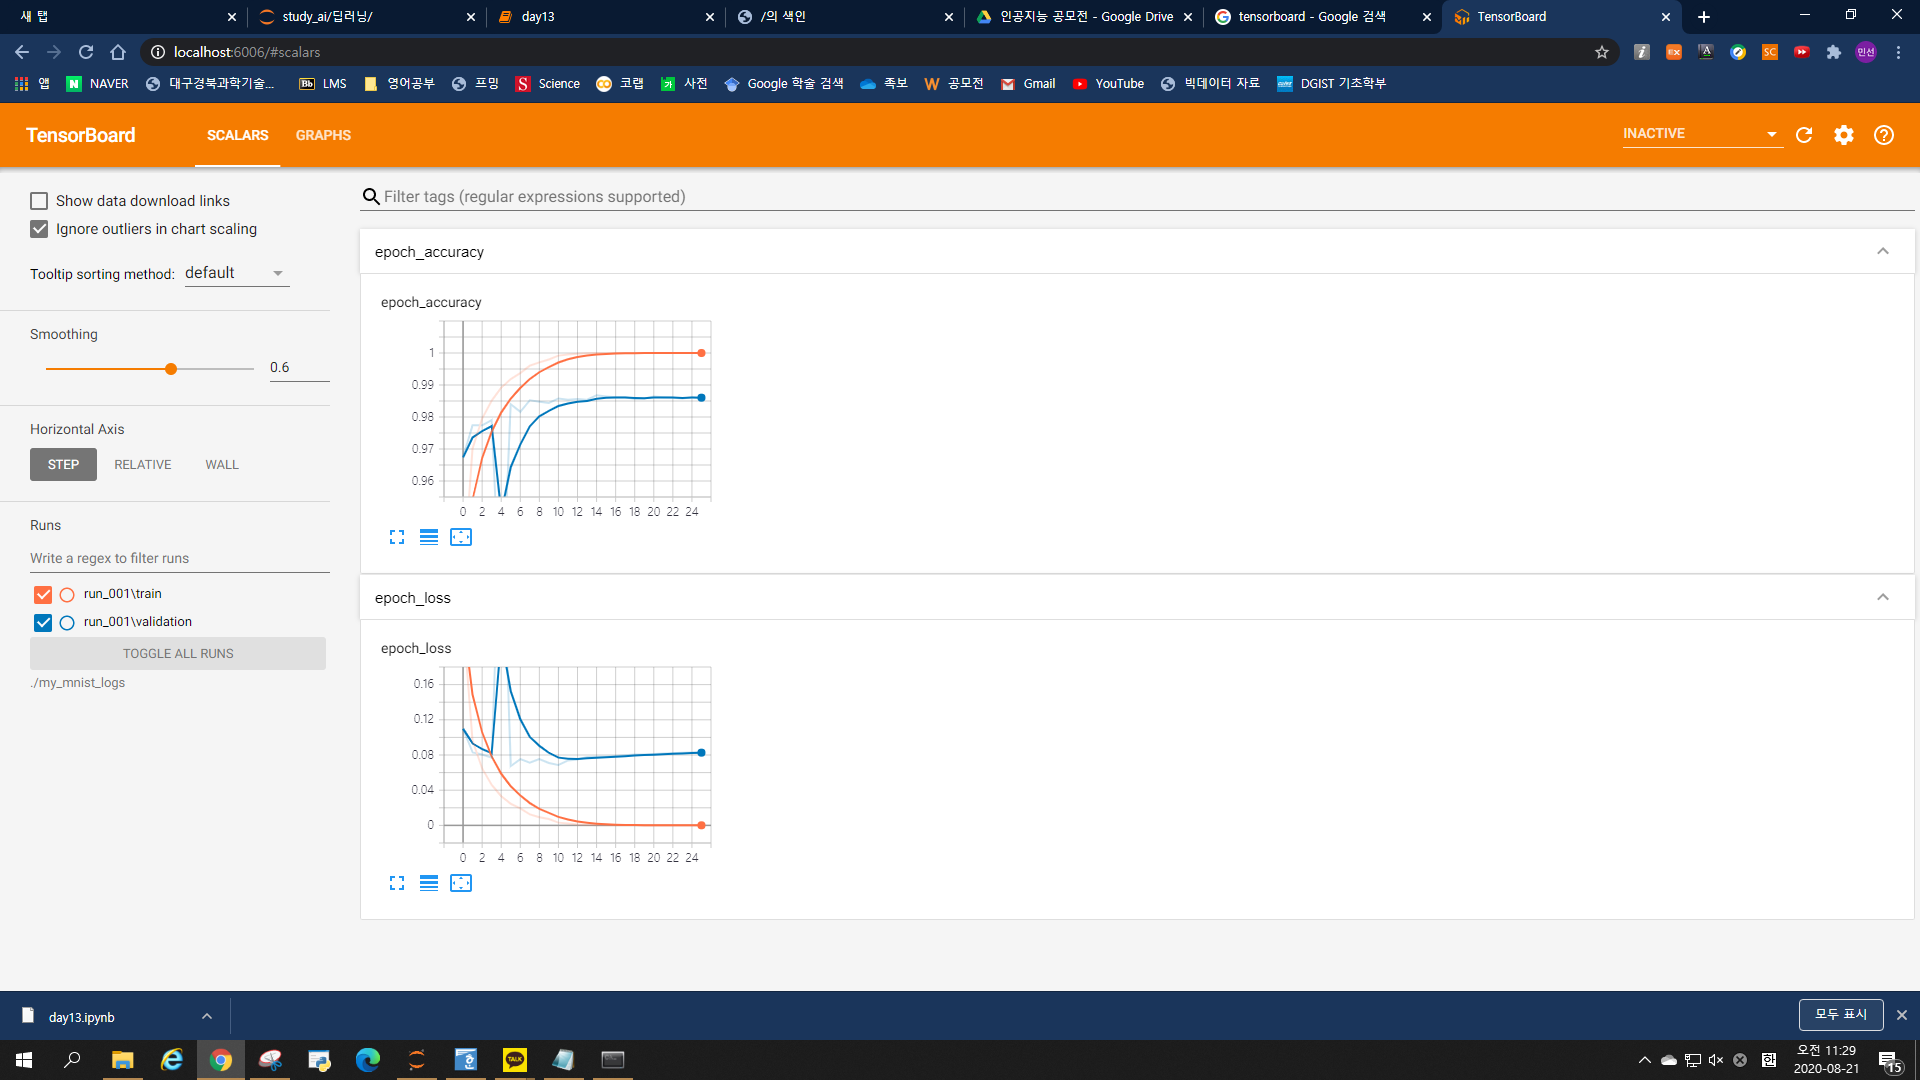

시각화해서볼 수 있음
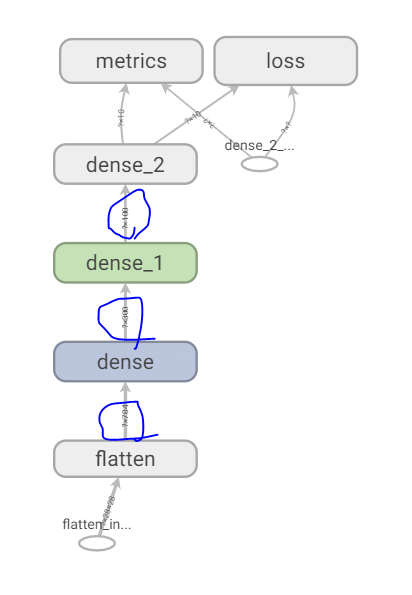

In [33]:
#잘 저장되어있는 데이터를 읽어서 
model=keras.models.load_model('my_mnist_model.h5')

In [34]:
model.evaluate(X_test,y_test)
#다른 컴퓨어에서 학습한것을 볼 수 있음
#[0.07132154556595197, 0.9788], [loss, test accuracy], 97.97% 정확도

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0713 - accuracy: 0.9788


[0.07132154556595197, 0.9788]

[ tensorboard 사용하기 ]
시작 > Anaconda3(64bit) > Anaconda Prompt(tf2) > cd study_ai > 
tensorboard --logdir=./my_mnist_logs --port=6006
웹 브라우저 : http://localhost:6006/
